In [195]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random
import time

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, LSTM

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [196]:
data = []
target_dir = os.path.join('dataset', 'xml_logs')

for root, subdirs, files in os.walk(target_dir):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                data.append((label, resampled))

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [197]:
print(data[0])

('arrow', array([[-1.98115675,  1.98053787],
       [-2.06546475,  1.99436522],
       [-1.93086964,  1.8442288 ],
       [-1.90192736,  1.76971743],
       [-1.78875077,  1.71317545],
       [-1.71781591,  1.57516255],
       [-1.57514812,  1.43563976],
       [-1.58042064,  1.39580667],
       [-1.34995696,  1.18830922],
       [-1.19546419,  0.99642441],
       [-0.960359  ,  0.83813815],
       [-0.78288021,  0.61858763],
       [-0.52384061,  0.46002859],
       [-0.32284315,  0.28639652],
       [-0.08225056,  0.0972638 ],
       [ 0.13539409, -0.04098562],
       [ 0.28665714, -0.18479149],
       [ 0.38552463, -0.22181367],
       [ 0.54906291, -0.37553448],
       [ 0.62910992, -0.43764128],
       [ 0.77023395, -0.53465178],
       [ 0.81775568, -0.56226704],
       [ 0.89772108, -0.61428591],
       [ 0.7960657 , -0.65419655],
       [ 0.7157478 , -0.69746153],
       [ 0.5429837 , -0.65135589],
       [ 0.34374538, -0.64974188],
       [ 0.22664267, -0.6529458 ],
       [ 0

## Let's have a look at our data

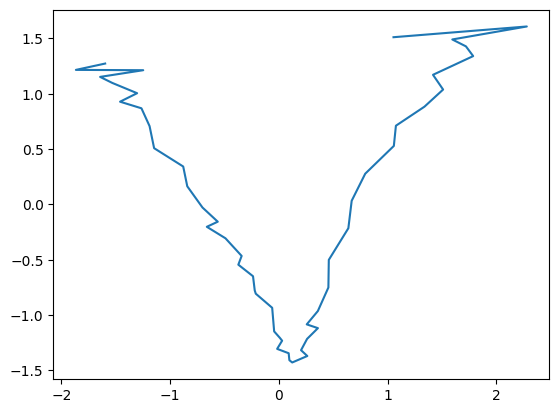

In [198]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

In [199]:
# Prepare the data
labels = [sample[0] for sample in data]

print(set(labels))
print("all la")
print(labels)

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)



y = to_categorical(labels_encoded)

print(len(y[0]))

sequences = [sample[1] for sample in data]
X = np.array(sequences)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

{'triangle', 'caret', 'circle', 'left_sq_bracket', 'rectangle', 'arrow', 'left_curly_brace', 'right_curly_brace', 'star', 'right_sq_bracket', 'pigtail', 'v', 'x', 'check', 'question_mark', 'delete_mark'}
all la
['arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_sq_bracket', 'left_sq_bracket', 'left_sq_bracket', 'left_sq_br

In [200]:

def model_builder(lstm_parameter):
    # Define the model
    model = Sequential()

    # add LSTM layer
    # input shape is (length of an individual sample, dimensions of the sample)
    # in our case: two dimensions, as we have X and Y coordinates

    # old syntax
    #model.add(LSTM(64, input_shape=(NUM_POINTS, 2)))

    # new syntax
    model.add(Input((NUM_POINTS, 2)))
    model.add(LSTM(lstm_parameter))

    # add dense layer to do machine learning magic
    model.add(Dense(32, activation='relu'))

    # here, you can add more layers and maybe a dropout for better performance

    # softmax layer for classification
    model.add(Dense(len(set(labels)), activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [201]:
def train_model(model):
    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1,
        callbacks=[reduce_lr, stop_early]
    )
    return history

In [202]:
def show_training_results(model, history):
    
    #Trainigns advancement
    model.summary()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    fig = plt.figure(figsize=(15, 7))
    ax = plt.gca()

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy (Line), Loss (Dashes)')

    ax.axhline(1, color='gray')

    plt.plot(accuracy, color='blue')
    plt.plot(val_accuracy, color='orange')
    plt.plot(loss, '--', color='blue', alpha=0.5)
    plt.plot(val_loss, '--', color='orange', alpha=0.5)
    


    #Confusion Matrix    
    # let the model make predictions for our training data
    y_predictions = model.predict(X_test)

    # to build a confusion matrix, we have to convert it to classifications
    # this can be done by using the argmax() function to set the probability to 1 and the rest to 0
    y_predictions = np.argmax(y_predictions, axis=1)

    y_test_labels = np.argmax(y_test, axis=1)

    # create and plot confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, y_predictions)

    fig = plt.figure(figsize=(10, 10))

    ConfusionMatrixDisplay(conf_matrix, display_labels=set(labels)).plot(ax=plt.gca())

    plt.xticks(rotation=90, ha='center')
    pass

In [203]:
#load validation data

val_data = []
target_dir = os.path.join('dataset', 'dataset')

for root, subdirs, files in os.walk(target_dir):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                val_data.append((label, resampled))
                
                
# Prepare the data
val_labels = [sample[0] for sample in val_data]



encoder = LabelEncoder()
val_labels_encoded = encoder.fit_transform(val_labels)

print(set(val_labels_encoded))

val_y = to_categorical(val_labels_encoded)

print(len(val_y[0]))

sequences = [sample[1] for sample in val_data]
val_X = np.array(sequences)

  0%|          | 0/161 [00:00<?, ?it/s]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
16


In [204]:
#Evaluate the model
def evaluate_model(model):
    #matrix
    # let the model make predictions for our training data
    start_time = time.time()
    y_predictions = model.predict(val_X)
    elapsed_time = time.time() - start_time
    mean_time = elapsed_time / len(val_X)
    
    print(y_predictions )
    # to build a confusion matrix, we have to convert it to classifications
    # this can be done by using the argmax() function to set the probability to 1 and the rest to 0
    y_predictions = np.argmax(y_predictions, axis=1)

    # create and plot confusion matrix
    val_y_labels = np.argmax(val_y, axis=1)
    
    
    print("val:val_y_labels")
    print(val_y_labels)
    conf_matrix = confusion_matrix(val_y_labels, y_predictions)

    fig = plt.figure(figsize=(10, 10))
    ConfusionMatrixDisplay(conf_matrix, display_labels=set(labels)).plot(ax=plt.gca())
    plt.xticks(rotation=90, ha='center')
    val_loss, val_accuracy = model.evaluate(val_X, val_y, verbose=0)
    return  val_loss, val_accuracy, mean_time, elapsed_time

# Lstm_Parameter 64

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4003 - loss: 2.1029 - val_accuracy: 0.9417 - val_loss: 0.3097 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9578 - loss: 0.2273 - val_accuracy: 0.9631 - val_loss: 0.1285 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9768 - loss: 0.0942 - val_accuracy: 0.9728 - val_loss: 0.1035 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9711 - loss: 0.0926 - val_accuracy: 0.9573 - val_loss: 0.1909 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9776 - loss: 0.0918 - val_accuracy: 0.9845 - val_loss: 0.0550 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9870 - loss: 0.0497 - val_accuracy: 0.9883 - val_loss: 0.0321 - learning_rate: 0.0010
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9874 - loss: 0.

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                  │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,282 (231.57 KB)

 Trainable params: 19,760 (77.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,522 (154.39 KB)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


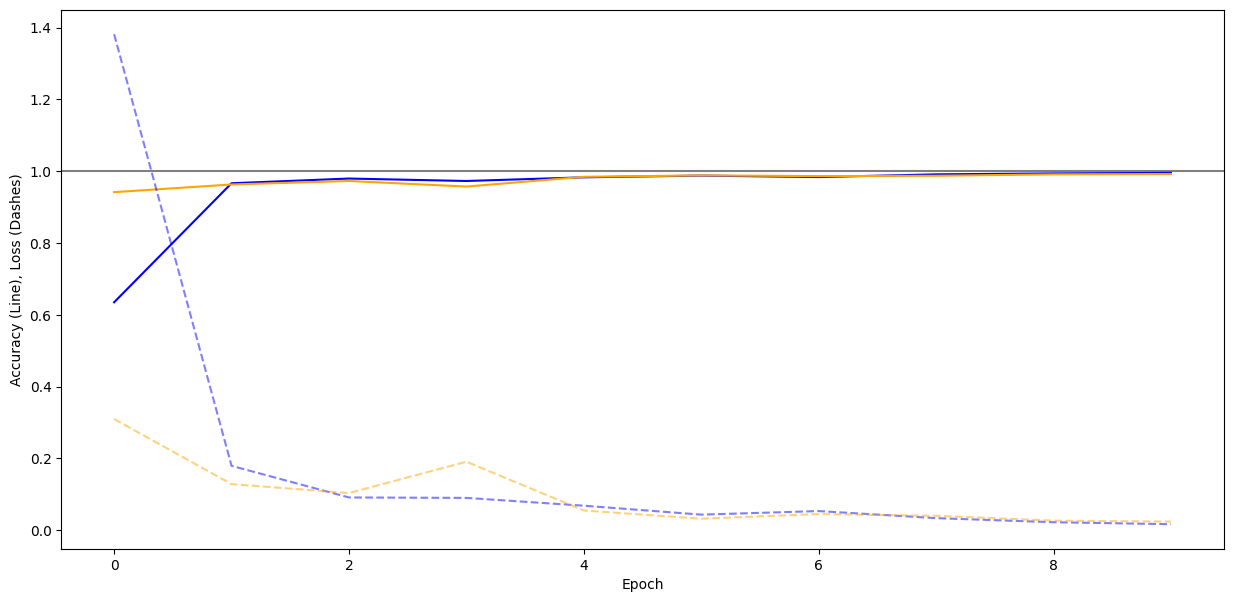

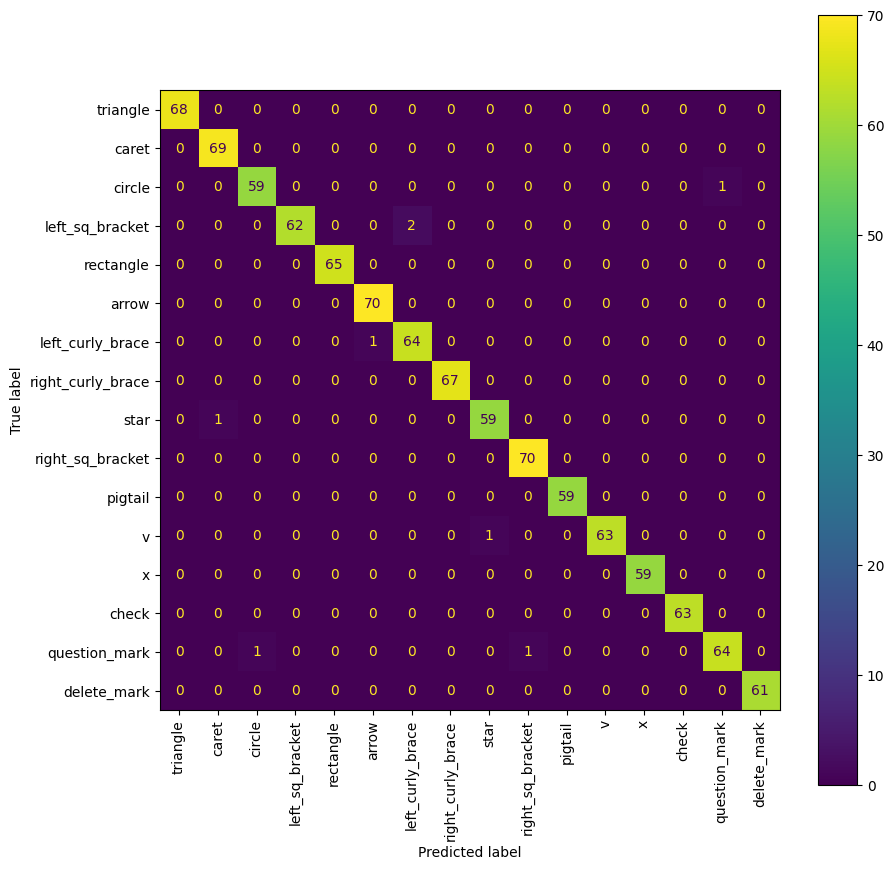

In [205]:
model_1 = model_builder(64)
history_1 = train_model(model_1)
show_training_results(model_1,history_1)


# Lstm_Parameter 32

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2937 - loss: 2.4224 - val_accuracy: 0.6777 - val_loss: 1.0045 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8071 - loss: 0.7249 - val_accuracy: 0.9427 - val_loss: 0.2695 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9565 - loss: 0.2316 - val_accuracy: 0.9718 - val_loss: 0.1285 - learning_rate: 0.0010


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 32)             │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,194 (71.07 KB)

 Trainable params: 6,064 (23.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,130 (47.39 KB)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


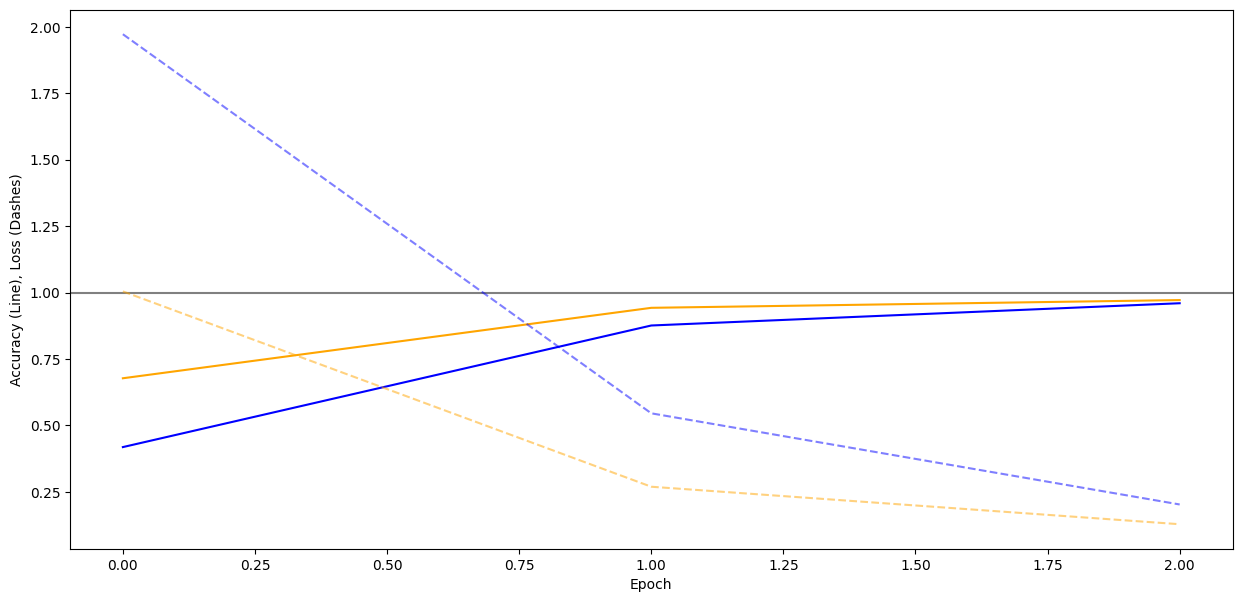

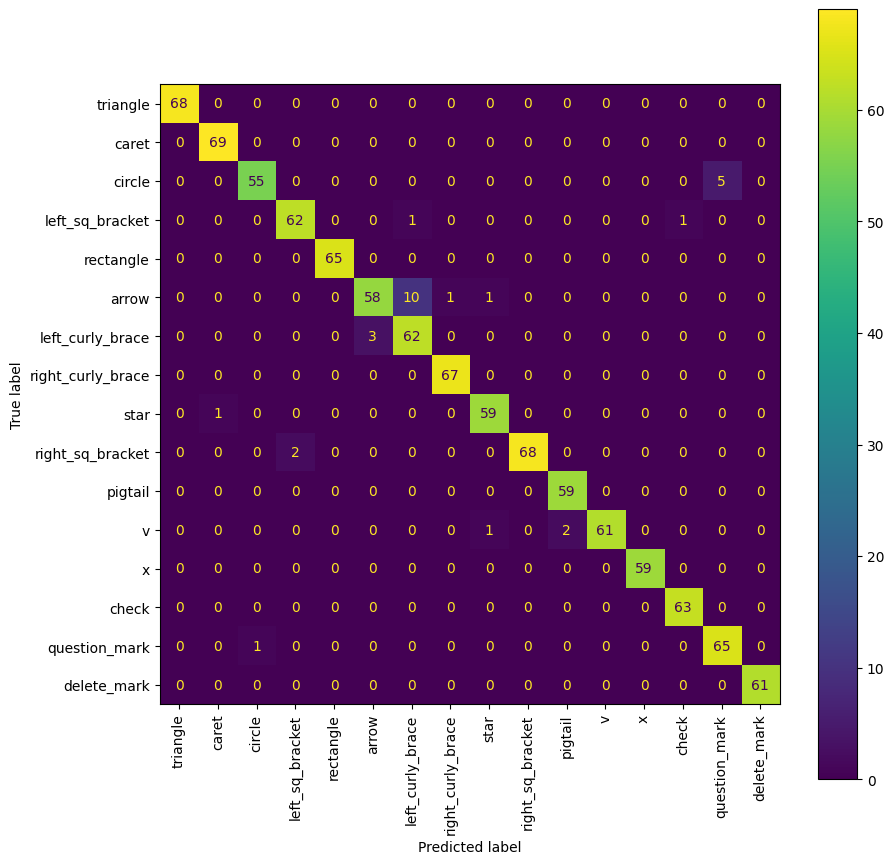

In [206]:
model_2 = model_builder(32)
history_2 = train_model(model_2)
show_training_results(model_2,history_2)


# Lstm_Parameter 16

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2307 - loss: 2.5588 - val_accuracy: 0.3796 - val_loss: 1.6836 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5509 - loss: 1.3944 - val_accuracy: 0.7748 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8420 - loss: 0.5706 - val_accuracy: 0.9126 - val_loss: 0.3275 - learning_rate: 0.0010


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                  │ (None, 16)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,866 (26.82 KB)

 Trainable params: 2,288 (8.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,578 (17.89 KB)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


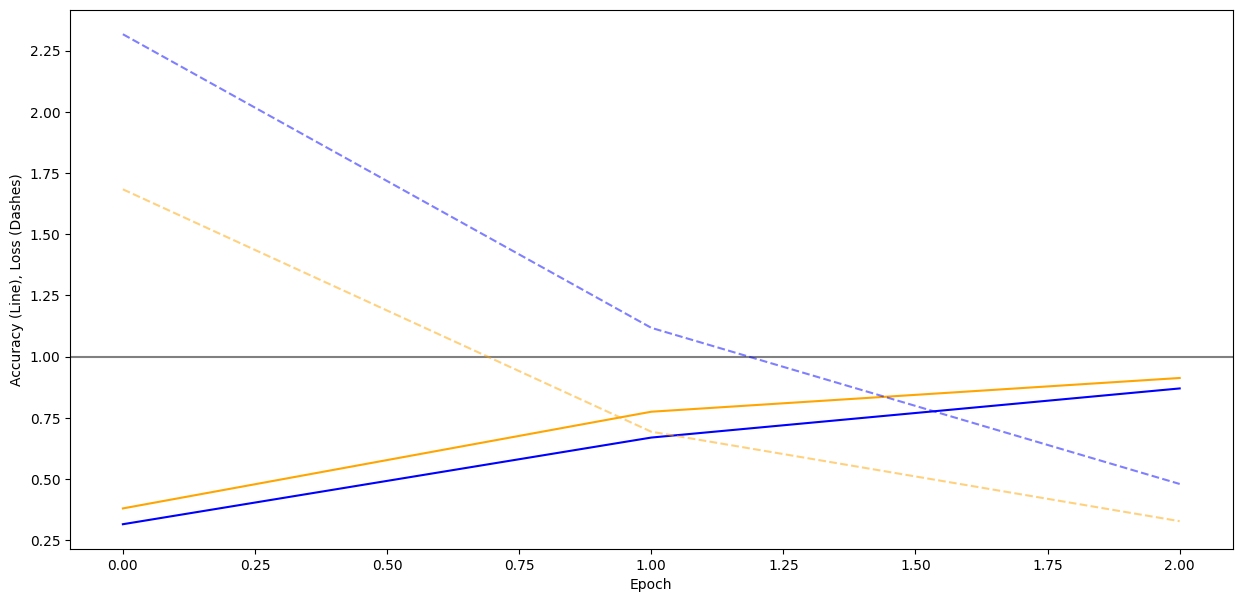

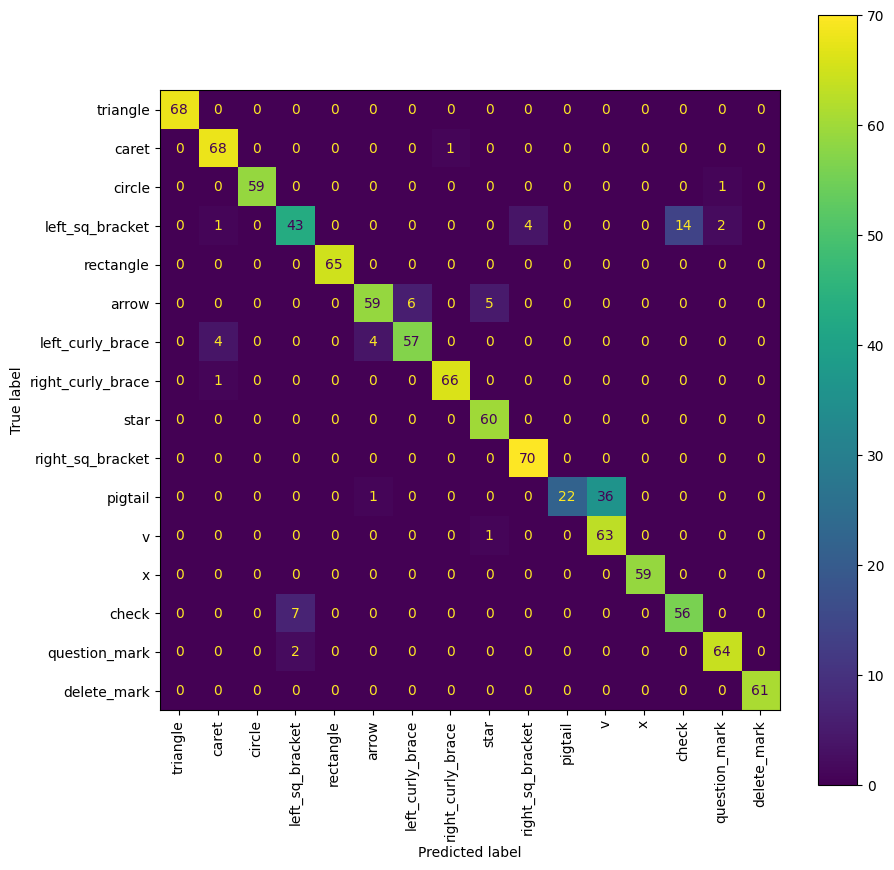

In [207]:
model_3 = model_builder(16)
history_3 = train_model(model_3)
show_training_results(model_3,history_3)


# $1 gesture recognizer

In [208]:
from recognizer import dolar_recognizer
from recognizer import Unistroke
from Point import Point
import Strokes


s = Strokes.Unistrokes
dr = dolar_recognizer(s)
def evaluate_recognizer():
    print(val_X[0])
    print(val_X[0][0])
    print(val_X[0][0][0])
    points = [] 
    names = []
    score = []
    time = []
    accuracy = 0
    label_list = []
    #convert array to points
    for v in range(len(val_X)):
        points.clear()
        for p in val_X[v]:
            points.append(Point(p[0],p[1]))
        result = dr.Recognize(points,True)
        print(result.Name)
        names.append(result.Name)
        score.append(result.Score)
        time.append(result.Time)
        if( val_labels[v] == result.Name):
            accuracy +=1
            
    accuracy = accuracy/(len(val_X))  
    time_mean = np.mean(time)
    time_sum = np.sum(time)      
    print("---")
    print(str(accuracy))
   
   
   
    #Created with ChatGPT->
    # create and plot confusion matrix
    val_y_labels = np.argmax(val_y, axis=1)
    # Step 1: Identify all unique labels
    all_labels = sorted(list(set(val_labels).union(set(names))))

    # Step 2: Ensure confusion matrix covers all labels
    conf_matrix = confusion_matrix(val_labels, names)

    # Step 3: Display the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    ConfusionMatrixDisplay(conf_matrix, display_labels=all_labels).plot(ax=ax)
    plt.xticks(rotation=90, ha='center')
    plt.show()
    

    return accuracy, time_mean, time_sum


# Evaluating the Models

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[9.9899572e-01 2.1124184e-04 8.5624255e-05 ... 1.9735287e-08
  3.2110790e-06 2.3135721e-05]
 [9.9370921e-01 4.8949639e-03 1.4262802e-04 ... 9.1912575e-08
  2.3530718e-05 3.8173734e-05]
 [9.9792260e-01 1.1261752e-03 9.3146838e-05 ... 4.1644228e-08
  8.3360101e-06 2.7844768e-05]
 ...
 [1.2741354e-03 1.3551193e-06 3.2017683e-04 ... 1.9082518e-05
  6.5863532e-07 9.7873288e-01]
 [1.7543696e-05 1.0103021e-06 3.8014706e-03 ... 6.9818331e-04
  8.9803129e-04 3.0118688e-03]
 [4.1272547e-04 6.3090090e-07 1.2124675e-04 ... 2.4870113e-05
  1.9604130e-07 9.8821217e-01]]
val:val_y_labels
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 

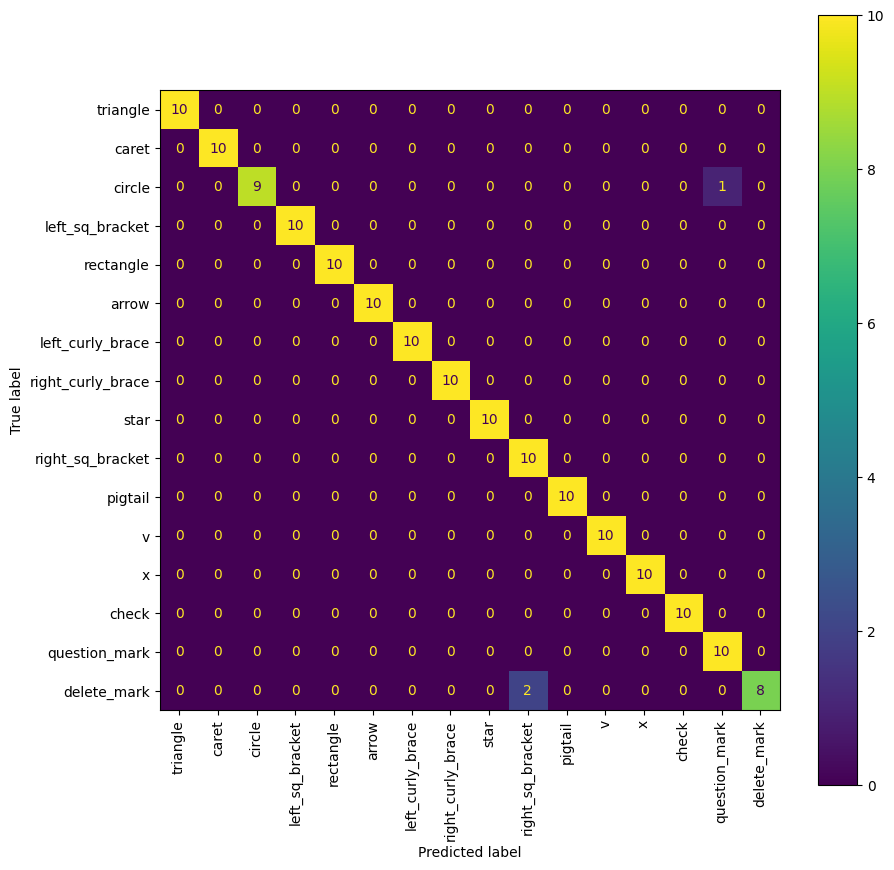

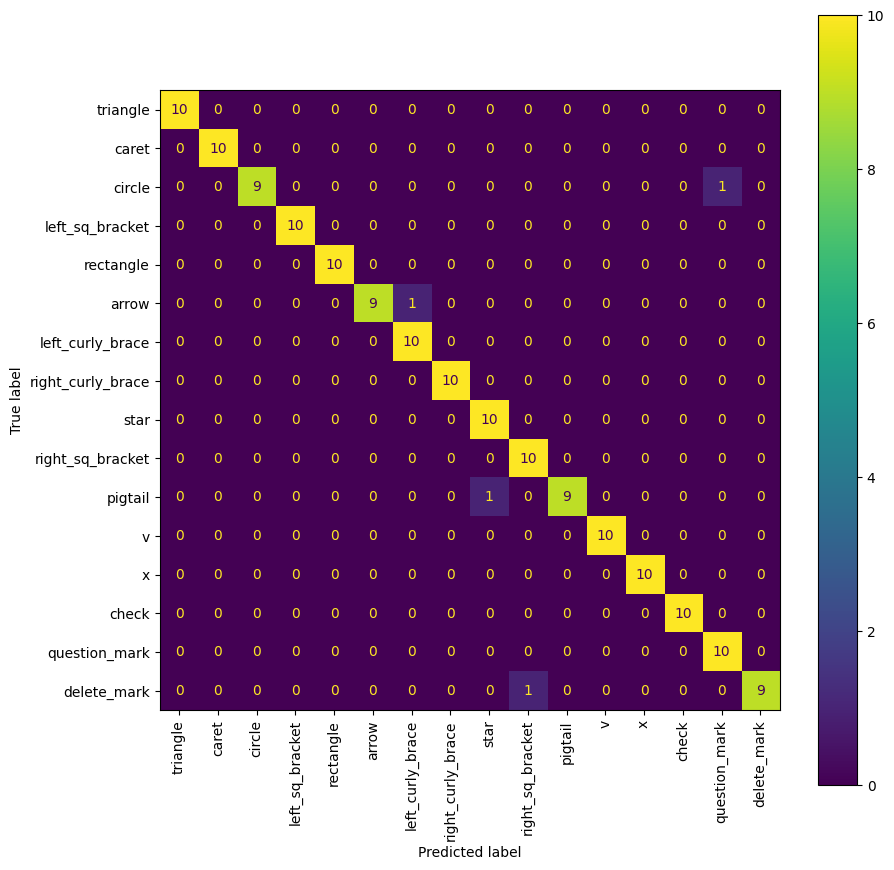

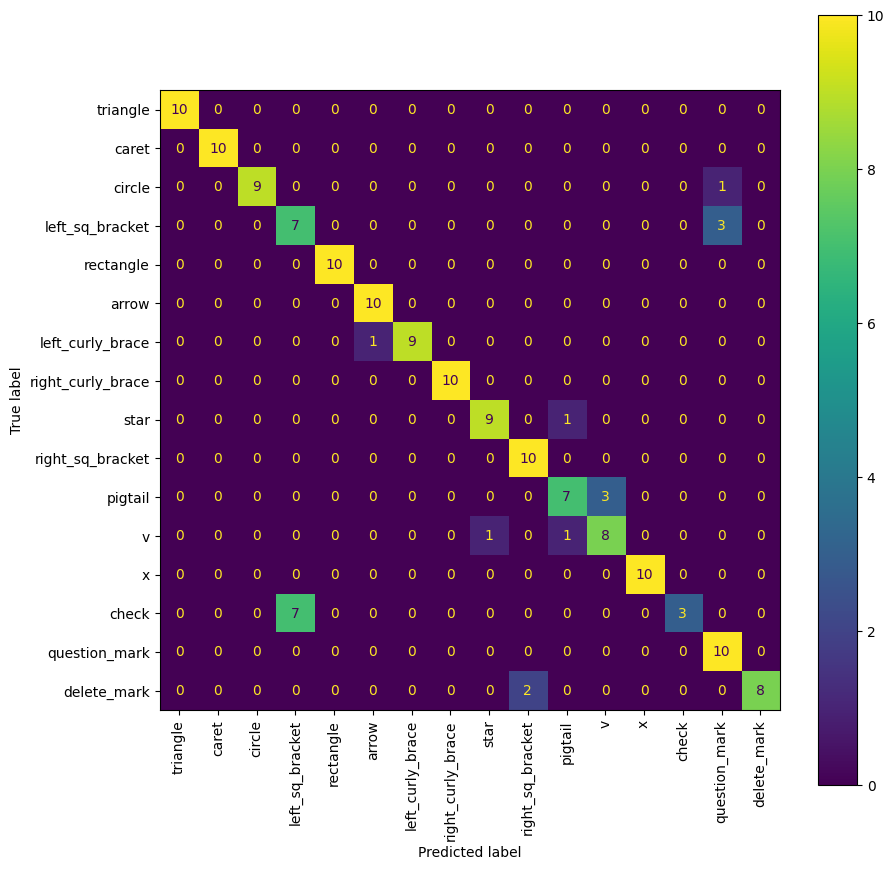

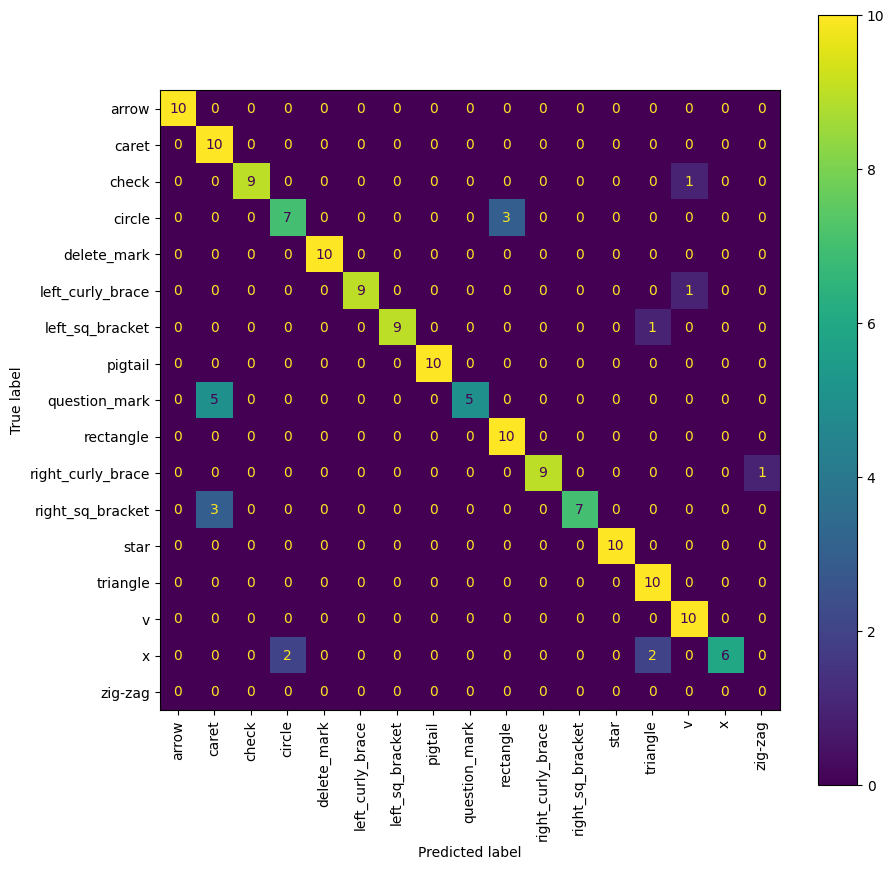

loss:0.078611359000206 accuracy:0.981249988079071
loss:0.15824957191944122 accuracy:0.9750000238418579
loss:0.42039570212364197 accuracy:0.875


In [209]:
val_loss_1, val_accuracy_1, time_mean_1, time_sum_1 = evaluate_model(model_1)
val_loss_2, val_accuracy_2, time_mean_2, time_sum_2 = evaluate_model(model_2)
val_loss_3, val_accuracy_3, time_mean_3, time_sum_3 = evaluate_model(model_3)
val_accuracy_dolar, time_mean_dolar, time_sum_dolar = evaluate_recognizer()

print("loss:"+str(val_loss_1)+" accuracy:"+str(val_accuracy_1))
print("loss:"+str(val_loss_2)+" accuracy:"+str(val_accuracy_2))
print("loss:"+str(val_loss_3)+" accuracy:"+str(val_accuracy_3))



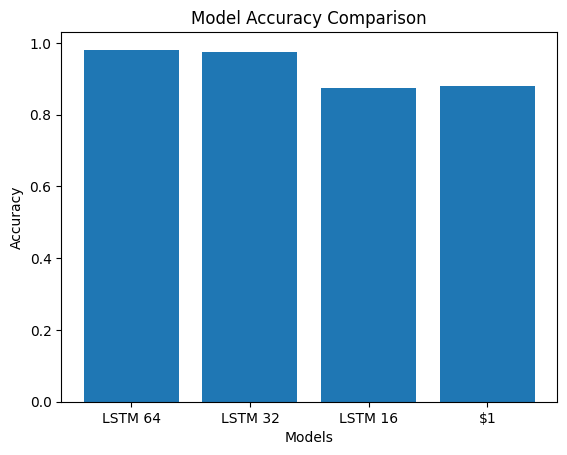

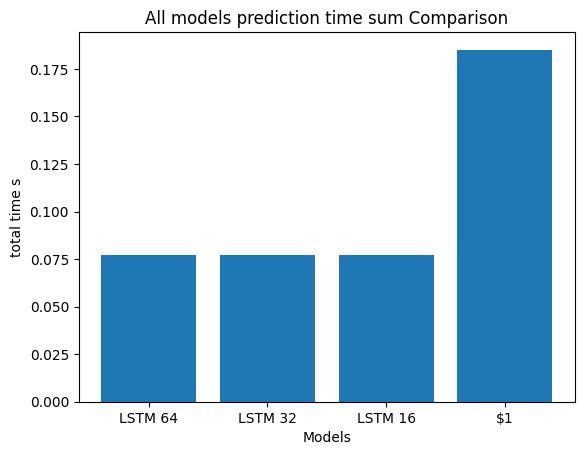

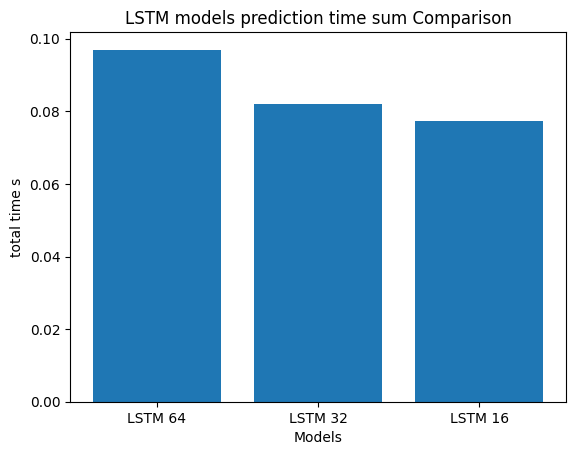

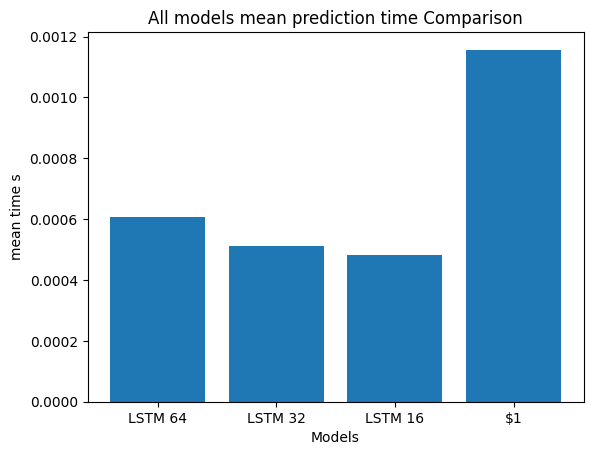

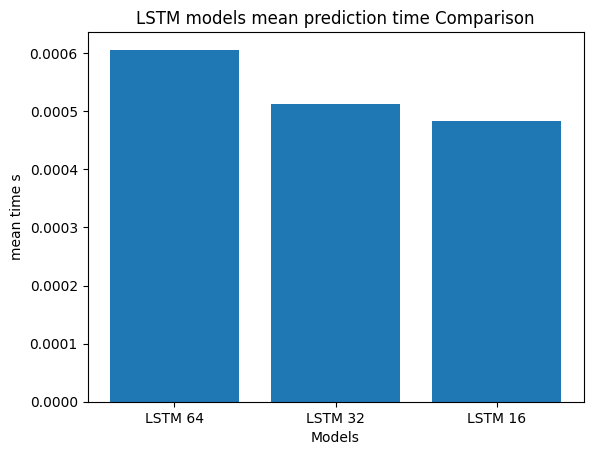

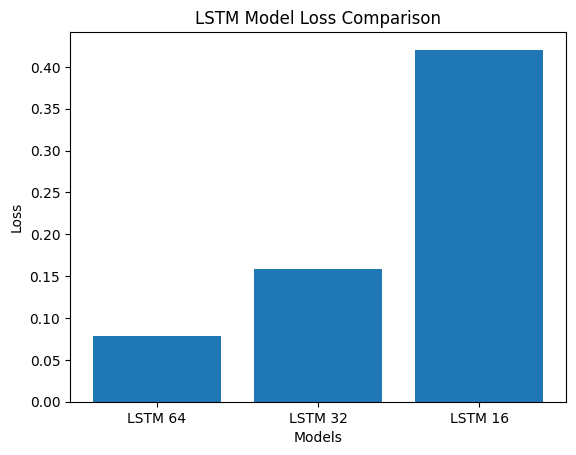

In [210]:
#How to create Graph created with ChatGPT->

values= [val_accuracy_1,val_accuracy_2,val_accuracy_3,val_accuracy_dolar]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16', '$1']
plt.bar(positions, values, tick_label=labels)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()



time_mean_dolar = time_mean_dolar.total_seconds()
time_sum_dolar = time_sum_dolar.total_seconds()

values= [time_sum_3,time_sum_3,time_sum_3,time_sum_dolar]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16', '$1']
plt.bar(positions, values, tick_label=labels)
plt.title('All models prediction time sum Comparison')
plt.xlabel('Models')
plt.ylabel('total time s')
plt.show()


values= [time_sum_1,time_sum_2,time_sum_3]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16']
plt.bar(positions, values, tick_label=labels)
plt.title('LSTM models prediction time sum Comparison')
plt.xlabel('Models')
plt.ylabel('total time s')
plt.show()

values= [time_mean_1,time_mean_2,time_mean_3,time_mean_dolar]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16', '$1']
plt.bar(positions, values, tick_label=labels)
plt.title('All models mean prediction time Comparison')
plt.xlabel('Models')
plt.ylabel('mean time s')
plt.show()

values= [time_mean_1,time_mean_2,time_mean_3]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16']
plt.bar(positions, values, tick_label=labels)
plt.title('LSTM models mean prediction time Comparison')
plt.xlabel('Models')
plt.ylabel('mean time s')
plt.show()

values= [val_loss_1,val_loss_2,val_loss_3]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16']
plt.bar(positions, values, tick_label=labels)
plt.title('LSTM Model Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()




In [211]:

model_2.save('LSTM_32_model.keras')


# Report

The confusion matrix shows that the model with 64 LSTM Parameters only misjudged 3 predictions.

The one with 32 LSTM parameters misjudged 4 predictions

The one with 16 LSTM parameters misjudged 19 predictions.

The $1 Prediction misjudged 19 predictions.


From the information above and in the graph for the Model Accuracy comparison, it is clear that with fewer LSTM Parameters, the accuracy fell. The number of parameters and their Accuracy are, however, not one-to-one. There is very little difference between the 64 and 32 LSTM Model, and the LSTM 16 model still had over 85% accuracy. The $1 recognizer is as accurate as the LSTM 16 Model.


For the LSTM 64 Models, the prediction time was about 0.95 total, or 0.0006 seconds mean (per individual prediction). For the LSTM 32 model, it was 0.08 total, or 0.0005 about 0.95 for all predictions. For the LSTM 16 model, it was a bit less than 0.08 total and a bit less than 0.0005 mean seconds. This shows that Models with Les LSTM tend to be a bit faster. The $1 Recognizer was a lot slower, with a total prediction time of over 0.175 and a mean prediction time of 0.0018


The 32 LSTM model performed the best in this category. Surprisingly, the 16-parameter LSTM model took the longest among the LSTM models. The $1 model, however, took a lot longer, with around 0.27 seconds.

One Prediction for the LSTM 64 model took, on average, a bit over 0.008 seconds. For the LSTM 32 Model, a bit under 0.00075 seconds. For the LSTM 16 Model, a bit under 0.001 second, and for the $1 recognizer, around 0.00175 seconds.


This means that even the LSTM 64 model was not only more accurate but also faster than the $1 recognizer. For a serious real-world application, I would therefore probably use the LSTM 64 or LSTM 16 Model, depending on whether Accuracy or latency were the main focus.


For task 3, I have, however, chosen the $1 recognizer for multiple reasons.7

1. It easily lets me reuse the code from Task 1 for Task 3.

2. It allowed me to work on task 3 before finishing task 2.

3. The slower prediction time of the $1 recognizer does not matter for my intended application, since the application does not need a live prediction and has no time pressure.

4. The code is more easily debuggable should errors arise.
